<center>
<img src="logo.png" height="900"> 
</center>


#  Распределения

В этом задании мы немного поработаем в python с разными случайными величинами. Делать это задание необязательно, но рекомендуется. 

In [3]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

## Упражнение 1 

> Нормальность восстановлена, мы на орбите Магратеи (Автостопом по галактике) 

__а)__ Задайте генератор для случайной величины имеющей нормальное распределение: $X \sim N(4, 10^2)$. 

In [4]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

norm_rv = sts.norm(loc=4, scale=10)

# your code here


In [5]:
sample = norm_rv.rvs(1000)  # сгенерируем 1000 значений
sample[:20]

array([  0.80851215,   6.0139276 ,  -0.95376758, -13.25048022,
         8.25175485,   0.77934686,   6.04957059,  -0.44925868,
        -4.69082691,   3.83607875,   6.72556536,   4.04917148,
       -15.3950603 ,   7.03057277, -10.39680257,   2.26408483,
        14.98338109,  13.80862875,   7.05026546, -10.70954195])

In [6]:
norm_rv.pdf(1)

0.038138781546052415

In [7]:
x = np.linspace(-50, 50, 1000)
pdf = norm_rv.pdf(x)


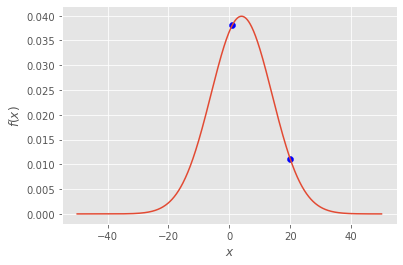

In [8]:
plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(1)
plt.scatter([1,20], [norm_rv.pdf(1), norm_rv.pdf(20)], color="blue");

__б)__ Найдите вероятности $P(X > 4)$, $P(X \in [2; 20])$, $P(X < −5)$. Запишите их в переменные `p1, p2, p3`. 

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p1 = 1 - norm_rv.cdf(4) 
p2 = norm_rv.cdf(20) - norm_rv.cdf(2)
p3 = norm_rv.cdf(-5)

p1, p2, p3
# your code here


(0.5, 0.5244604177395451, 0.18406012534675947)

In [10]:
# Проверка корректно ли вы нашли вероятности :) 
# Задание необязательное, поэтому все тесты открытые

assert p1 == 0.5
assert np.abs(p2 - 0.5244604) < 1e-5
assert np.abs(p3 - 0.18406012) < 1e-5

__в)__ Найдите число $a$ такое, что $P(X > a) = 0.3$.

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

a = norm_rv.ppf(1-0.3) # потому что в задании знак >, а не < как в формуле ppf
a
# your code here


9.244005127080406

In [12]:
assert np.abs(a - 9.2440051) < 1e-5

__г)__ Найдите число $b$ такое, что $P(X \in [4 - b; 4 + b]) = 0.5$.

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

b = 4 - norm_rv.ppf(0.5/2)
b
# your code here


6.744897501960817

In [15]:
assert np.abs(b - 6.7448975) < 1e-5

__д)__ Сгенерируйте выборку размера $100$. Постройте по этой выборке гистограмму. На том же рисунке изобразите плотность распределения нормальной случайной величины. 

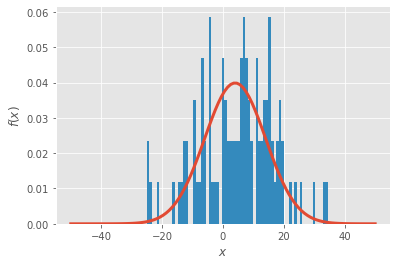

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

sample = norm_rv.rvs(100)

x = np.linspace(-50, 50, 100)
pdf = norm_rv.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

# гистограмма, параметр density отнормировал её. 
plt.hist(sample, bins=70, density=True);

plt.ylabel('$f(x)$')
plt.xlabel('$x$');

__е)__ Оцените эмпирическую функцию распределения. Изобразите её и теоретическую функцию распределения на графике. 

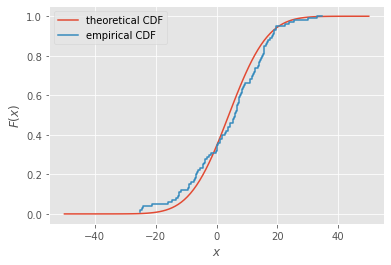

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF

x = np.linspace(-50, 50, 100)

# теоретическа cdf 
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# эмпирическая сdf
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

# your code here


## Упражнение 2 

> Звёзды лучше видны с крыши, полезай и проверь сам. Ты так ждал этот знак свыше, и отметил его как спам. (Дайте танк) 

Пусть количество писем со спамом, которое пришло к нам на почту, имеет распределение Пуассона. Предположим, что вы получаете в среднем три спам-письма в день. Какова доля дней, в которые вы получаете пять или больше спам-писем?

In [19]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p = 1 - sts.poisson.cdf(5, 3, loc = 1) # так и не понял, что здесь означает loc
p
# your code here


0.1847367554762278

In [20]:
assert np.abs(p - 0.1847367) < 1e-5

## Упражнение 3 

Во время ЧЕ по футболу 2008 года и ЧМ 2010 года Осьминог Пауль занимался прогнозированием побед (после он ушёл в финансовую аналитику и IB). Осьминог дал верные прогнозы в 12 случаях из 14. Если предположить, что Пауль выбирает победителя наугад, какова вероятность получить 12 верных прогнозов из 14?

In [21]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
import math
k = 12
n = 14

# из формулы биноминального распределения из лекции про случайные величины
p = (math.factorial(n)/(math.factorial(k)*math.factorial(n-k)))*(0.5**k)*(0.5**(n-k))
p
# your code here


0.00555419921875

In [22]:
assert np.abs(p - 0.0055541) < 1e-5

Если предположить, что Осьминог правильно выбирает победителя с вероятностью $0.9$, какова вероятность получить тот же результат? 

In [23]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

p = (math.factorial(n)/(math.factorial(k)*math.factorial(n-k)))*(0.9**k)*(0.1**(n-k))
p
# your code here


0.2570108781977102

In [24]:
assert np.abs(p - 0.2570108) < 1e-5